#**Modelos de entrenamiento**
##**1. Resumen Regresión lineal**
1. Regresión lineal
  * Ecuación normal
2. Gradient Descent
  * Batch Gradient Descent
  * Stochastic Gradient Descent
  * Mini-batch Gradient Descent
3. Modelos lineales regularizados
   * Ridge Regression
   * Lasso Regression
   * Elastic Regression

##**2. Regresión logística**
##**3. Regresión logística multinomial o softmax**






#**1. Regresión lineal**
De manera más general, un modelo lineal hace una predicción simplemente calculando una suma ponderada de las características de entrada, más una constante llamada término de intersección (también llamado término de sesgo), como se muestra en la siguiente ecuación:

$$\hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$$

En esta ecuación:

* $\hat{y}$ es el valor que se predice.
* $n$ es el número de características.
* $x_i$ es el i-ésimo valor de la característica.
* $θ_j$ es el j-ésimo parámetro del modelo (incluido el término de sesgo $θ_0$ y las ponderaciones de características $θ_1$, $θ_2$, ⋯, $θ_n$).

Esto se puede escribir de manera más concisa en notación vectorial, como se muestra a continuación:

$$\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta}\cdot\mathbf{x}$$

donde

* $\mathbf{\theta}$ es el vector de parámetros del modelo, desde $θ_0$ y las características $θ_1$, $θ_2$, ⋯, $θ_n$.
* $\mathbf{x}$ es el vector de características de la instancia, que contiene de $x_0$ a $x_n$, con $x_0$ siempre igual a 1.
* $\mathbf{\theta}\cdot\mathbf{x}$ es el producto escalar entre los vectores $\mathbf{\theta}$ y $\mathbf{x}$.
* $h_{\mathbf{\theta}}$ es la función de hipótesis, utilizando los parámetros del modelo $θ$.

 


Si este es el modelo de regresión lineal, entonces, ¿cómo lo entrenamos? 

Recuerde que entrenar un modelo significa establecer sus parámetros para que el modelo se ajuste mejor al conjunto de entrenamiento. Para este propósito, primero necesitamos una medida de qué tan bien (o mal) se ajusta el modelo a los datos de entrenamiento. La medida más común de un modelo de regresión es la raiz del error cuadrático medio (RMSE). Por lo tanto, para entrenar un modelo de regresión lineal, debemos encontrar el valor de $θ$ que minimiza el $RMSE$. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE, y conduce al mismo resultado (porque el valor que minimiza un
función también minimiza su raíz cuadrada). El MSE de una hipótesis de regresión lineal $h_θ$ en un conjunto de entrenamiento $X$ se calcula usando la ecuación:

$$MSE(\mathbf{X},h_{\mathbf{\theta}})= \frac{1}{m}\sum_{i=1}^{m}(\mathbf{\theta}_T \mathbf{x}^{(i)} - y^{(i)})^2$$

Para simplificar las notaciones, simplemente escribiremos $MSE(\mathbf{θ})$ en lugar de $MSE(\mathbf{X},h_{\mathbf{\theta}})$.

##**Ecuación normal**
Para encontrar el valor de $\mathbf{θ}$ que minimiza la función de costo, existe una ecuación que da el resultado directamente. Esto se llama la Ecuación Normal:

$$\hat{\mathbf{θ}} = (\mathbf{X}^T\mathbf{X})^{-1} \,\mathbf{X}^T \,\mathbf{y}$$

En esta ecuación:

* $\hat{\mathbf{θ}}$ es el valor que $\mathbf{θ}$ que minimiza la función de costo.

* $\mathbf{y}$ es el vector de los valores que queremoe obtener, y contiene desde $y^{(1)}$ hasta $y^{(m)}$ 

Generemos algunos datos que tengan una tendencia lineal como $y = 4 + 3x + \mathcal{N(100,1)}$ para probar esta ecuación:

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

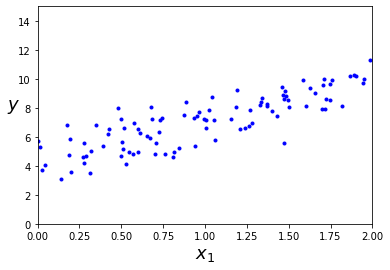

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Ahora calculemos $\hat{\mathbf{θ}}$ usando la *ecuación normal*. Usaremos la función `inv()` del módulo de álgebra lineal de NumPy (`np.linalg`) para calcular el inverso de una matriz y el método `dot()` para la multiplicación de matrices:

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # agrega x0 = 1 a cada instancia

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # (X^T X)^{-1} X^T y

La función que usamos para generar los datos es $y = 4 + 3x_1 + ruido\,Gaussiano$. Y lo que encontramos fue:

In [ ]:
theta_best

array([[4.28978182],
       [2.80177798]])

Encontramos $θ_0 = 4.289$ y $θ_1 = 2.801$. El ruido hace imposible recuperar los parámetros exactos de la función original.

Ahora, podemos hacer las predicciones usando $\hat{\mathbf{\theta}}$ y $\hat{y} = \mathbf{\theta}\cdot\mathbf{x}$:

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # # agregua x0 = 1 a cada instancia

y_predict = X_new_b . dot(theta_best) #\hat{y} = \hat{theta} \cdot x$$
y_predict

array([[4.28978182],
       [9.89333778]])

Podemos graficar las prediciones del modelo,

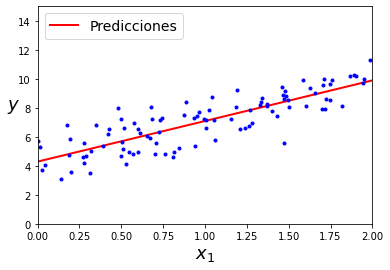

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predicciones")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Realizar una regresión lineal usando Scikit-Learn es bastante simple:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.28978182]), array([[2.80177798]]))

In [ ]:
lin_reg.predict(X_new)


array([[4.28978182],
       [9.89333778]])

La clase `LinearRegression` se basa en la función`scipy.linalg.lstsq()` (lo que significa "mínimos cuadrados"), los cuales pueden ser llamados directamente:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.28978182],
       [2.80177798]])

Esta función calcula $\mathbf{X}^+\mathbf{y}$, donde $\mathbf{X}^{+}$ is el *pseudoinverse* de $\mathbf{X}$ (específicamente Moore-Penrose inverse). Podemos usar `np.linalg.pinv()` para calcular el pseudoinverse directamente:

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.28978182],
       [2.80177798]])

###**Complejidad computacional**
La ecuación normal calcula la inversa de $\mathbf{X}^T \mathbf{X}$, que es una matriz $(n + 1) × (n + 1)$ (donde $n$ es el número de características). La complejidad computacional de invertir una matriz de este tipo suele ser de $O(n^{2.4})$ a $O(n^3)$ (dependiendo de la implementación).
En otras palabras, si duplica la cantidad de funciones, multiplica el tiempo de cálculo por aproximadamente $2^{2.4} = 5.3$ a $2^3 = 8$.

Una vez que haya entrenado su modelo de regresión lineal (usando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto a la cantidad de instancias en las que desea hacer predicciones y la cantidad de características. En otras palabras, hacer predicciones sobre el doble de instancias (o el doble de funciones) llevará aproximadamente el doble de tiempo.
Ahora veremos formas muy diferentes de entrenar un modelo de regresión lineal, más adecuado para los casos en los que hay una gran cantidad de funciones o demasiadas instancias de entrenamiento para caber en la memoria.

El método de descenso por gradiente, *Gradient Descent* de ahora en adelante, es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general de Gradient Descent es ajustar los parámetros iterativamente para minimizar una función de costo.

Concretamente, comienza llenando $\mathbf{θ}$ con valores aleatorios (esto se llama random initialization), y luego lo mejora gradualmente, dando un pequeño paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo.

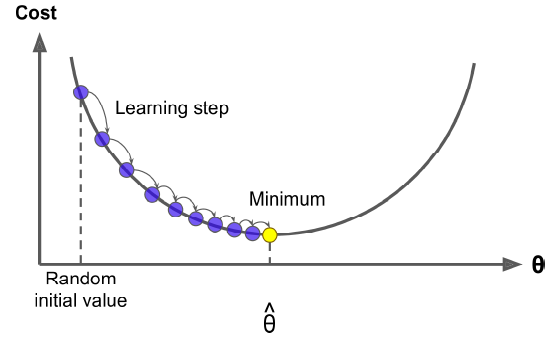





Hay diferentes formas de disminuir la función de costo para converger: 
  1. Batch Gradient Descent
  2. Stochastic Gradient Descent
  3. Mini-batch Gradient Descent
  [Más información...](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

  Vamos a implementar *Bath Gradient Descent*

###**Bath Gradient Descent**
Para implementar Gradient Descent, debe calcular el gradiente de la función de costo con respecto a cada parámetro del modelo $θ_j$. En otras palabras, debe calcular cuánto cambiará la función de costo si cambia $θ_j$ solo un poco. A esto se le llama derivada parcial. Es como preguntar "¿cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?" y luego haciendo la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás direcciones). La siguiente ecuación calcula la derivada parcial de la función de costo con respecto al parámetro $θ_j$, denotado como $∂\, MSE(\mathbf{θ}) \,/\, ∂θ_j$.

$$\frac{\partial}{\partial\theta_j}MSE(\mathbf{θ}) = \frac{2}{m}\sum_{i=1}^{m}(\mathbf{\theta}_T \mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$$

Una implementación rápida de este algoritmo es:




In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.28978182],
       [2.80177798]])

El *theta* resultante es:

In [ ]:
X_new_b.dot(theta)

array([[4.28978182],
       [9.89333778]])

Lo cual es exactamente lo que encontró *la ecuación normal*! Gradient Descent funcionó perfectamente.
Pero, ¿y si hubieras utilizado una tasa de aprendizaje eta diferente? La siguiente figura muestra los primeros 10 pasos de Gradient Descent utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

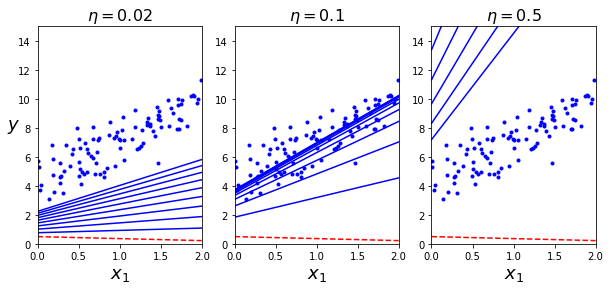

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo finalmente llegará a la solución, pero llevará mucho tiempo. En el medio, la tasa de aprendizaje parece bastante buena: en solo unas pocas iteraciones, ya ha convergido a la solución. A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, salta por todos lados y en realidad
alejándose cada vez más de la solución a cada paso.

**¿En qué cosiste Stochastic Gradient Descent y Mini-batch Gradient Descent?**



# **2. Modelos lineales Regularizados**
Una buena manera de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será sobreajustar los datos. Por ejemplo, una forma sencilla de regularizar un modelo polinomial es reducir el número de grados del polinomio.
Para un modelo lineal, la regularización generalmente se logra restringiendo los pesos del modelo. Ahora veremos ***Ridge Regression, Lasso Regression y Elastic Net***, que implementan tres formas diferentes de restringir los pesos.

## **Ridge Regression**

También llamada regularización de Tikhonov es una versión regularizada de la regresión lineal: se agrega un término de regularización igual a $αΣ_{i=1}^n θ_i^2$ a la función de costo. Esto obliga al algoritmo de aprendizaje no solo a ajustar los datos, sino también a mantener los pesos del modelo lo más pequeños posible. Tenga en cuenta que el término de regularización solo debe agregarse a la función de costo durante el entrenamiento. Una vez que se entrena el modelo, desea evaluar el rendimiento del modelo utilizando la medida de rendimiento no regularizado.

 $$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + αΣ_{i=1}^n θ_i^2$$

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

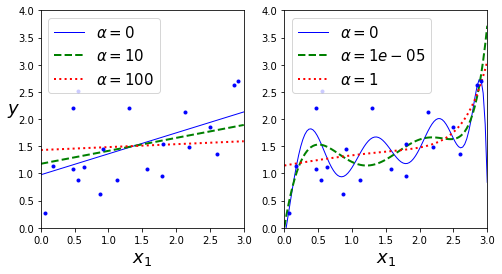

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

La Figura muestra varios modelos tipo Ridge Regression entrenados con algunos datos lineales utilizando diferentes valores de $α$. A la izquierda, se utilizan modelos Ridge sencillos, lo que lleva a predicciones lineales. A la derecha, los datos primero se expanden usando `PolynomialFeatures` (grado = 10), luego se escalan usando un `StandardScaler` y, finalmente, los modelos Ridge se aplican a las características resultantes: esto es Polynomial Regression with Ridge regularization. Tenga en cuenta cómo el aumento de $α$ conduce a predicciones más razonables; esto reduce la varianza del modelo pero aumenta su sesgo.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## **Lasso Regression**
Al igual que la Ridge regression, agrega un término de regularización a la función de costo, teniendo la siguiente forma:

$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + αΣ_{i=1}^n |θ_i|$$

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


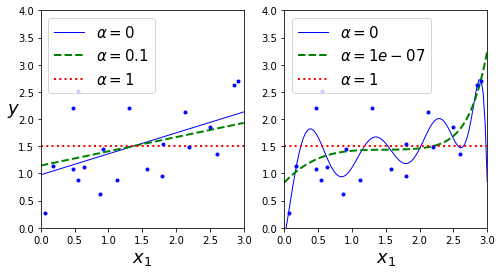

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## **Elastic Net**
Elastic Net es un término medio entre Ridge Regression y Lasso Regression. El término de regularización es una combinación simple de los términos de regularización de Ridge y Lasso, y puede tener el control a partir de *r*. Cuando r = 0, Elastic Net es equivalente a Ridge Regression, y cuando r = 1, es equivalente a Lasso Regression. La función de costo es:

$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + r αΣ_{i=1}^n |θ_i| + \frac{1-r}{2}αΣ_{i=1}^n θ_i^2$$

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#**3. Regresión logística**
Algunos algoritmos de regresión también se pueden usar para la clasificación (y viceversa). La regresión logística se utiliza para estimar la probabilidad de que una instancia pertenezca a una clase particular (por ejemplo, ¿cuál es la probabilidad de que un correo electrónico específico sea spam?). Si la probabilidad estimada es mayor al 50%, entonces el modelo predice que la instancia pertenece a esa clase (llamada la clase positiva, etiquetada como "1"), o bien predice que no lo hace (es decir, pertenece a la clase negativa, etiquetada como “0”). Esto lo convierte en un clasificador binario. 

###**Estimando probabilidades**

**¿Cómo funciona?** Al igual que un modelo de regresión lineal, un modelo de regresión logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de generar el resultado directamente como lo hace el modelo de regresión lineal, da la estimación de la probabilidad del modelo de regresión logística, que en notación vectorial se representa como: 

$$\hat{p}=h_{\mathbf{\theta}}(\mathbf{x}) = \sigma (\mathbf{x}^T\mathbf{\theta})$$

donde

* $\sigma()$ es una función sigmoide (es decir, con forma de S) que genera un número entre $0$ y $1$, la cual está definida como 

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

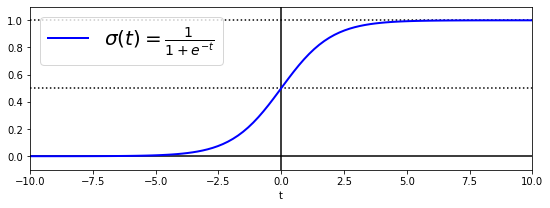

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Una vez que el modelo de Regresión Logística ha estimado la probabilidad $\hat{p} = h_{\mathbf{θ}}(\mathbf{x})$ de que una instancia $\mathbf{x}$ pertenezca a la clase positiva, puede hacer su predicción de $\hat{y}$ fácilmente.

\begin{equation}
  \hat{y} =
   \left \{
      \begin{array}{lccl}
          0 & si & \hat{p} < 0.5  \\
          1 & si & \hat{p} \geq 0.5  \\ 
      \end{array}
   \right .
\end{equation}

Observe que $σ(t) < 0.5$ cuando $t < 0$, y $σ(t) ≥ 0.5$ cuando $t ≥ 0$, por lo que un modelo de regresión logística predice $1$ si $\mathbf{x}^T\mathbf{θ}$ es positivo y $0$ si es negativo.

###**Entrenamiento y función de costo**
Sabiendo cómo un modelo de regresión logística estima probabilidades y hace predicciones, la pregunta ahora es **¿cómo se entrena?** El objetivo del entrenamiento es establecer el vector de parámetros $\mathbf{θ}$ para que el modelo estime altas probabilidades para instancias (observaciones) positivas ($y = 1$) y bajas probabilidades para instancias negativas ($y = 0$). Esta idea es capturada por la función de costo que se muestra a continuación para una sola instancia de entrenamiento $\mathbf{x}$:

\begin{equation}
  c(\mathbf{\theta}) =
   \left \{
      \begin{array}{lccl}
          -\log(\hat{p}) & si & y = 1  \\
          -\log(1-\hat{p}) & si & y = 0  \\ 
      \end{array}
   \right .
\end{equation}

Esta función de costo tiene sentido porque $\log(t)$ crece mucho cuando $t$ se aproxima a $0$, por lo que el costo será grande si el modelo estima una probabilidad cercana a $0$ para una instancia positiva, y también será muy grande si el modelo estima una probabilidad cercana a $1$ para una instancia negativa. Por otro lado, $\log(t)$ es cercano a $0$ cuando $t$ es cercano a $1$, por lo que el costo será cercano a $0$ si la probabilidad estimada es cercana a $0$ para una instancia negativa o cercana a $1$ para una instancia positiva, que es precisamente lo que queremos.

La función de costo de todo el conjunto de entrenamiento es simplemente el costo promedio de todas las instancias de entrenamiento. Se puede escribir en una sola expresión, llamada pérdida logarítmica, que se muestra en la siguiente ecuación:

$$J(\mathbf{\theta})=-\frac{1}{m}\sum_{i=1}^m \left[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right]$$

La mala noticia es que no existe una ecuación de forma cerrada conocida para calcular el valor de $\mathbf{θ}$ que minimice esta función de costo (no existe un equivalente de la ecuación normal).

Pero la buena noticia es que esta función de costo es convexa, por lo que se garantiza cualquier algoritmo de optimización encuentre el mínimo global (si la tasa de aprendizaje no es demasiado grande y espera lo suficiente). Las derivadas parciales de la función de costo con respecto al j-ésimo parámetro del modelo $θ_j$ están dadas por la siguiente ecuación:

$$\frac{\partial}{\partial\theta_j}J(\mathbf{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left[(\sigma(\mathbf{\theta}^T\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)}\right]$$

Para cada instancia, calcula el error de la predicción y lo multiplica por el el valor j-ésimo característico, y luego calcula el promedio de todas las instancias de entrenamiento. Una vez que tenga el vector de gradiente que contiene todas las derivadas parciales, puede usarlo en el algoritmo de `Batch Gradient Descent`. Y eso es todo!, ahora sabe cómo entrenar un modelo de regresión logística. 

###**Límites de decisión**
Usemos el conjunto de datos del IRIS (utilizando Seaborn) para ilustrar la regresión logística. Este es un famoso conjunto de datos que contiene la longitud y el ancho de sépalos y pétalos de 150 flores de iris de tres especies diferentes: *Iris-Setosa, Iris-Versicolor* e *Iris-Virginica*.

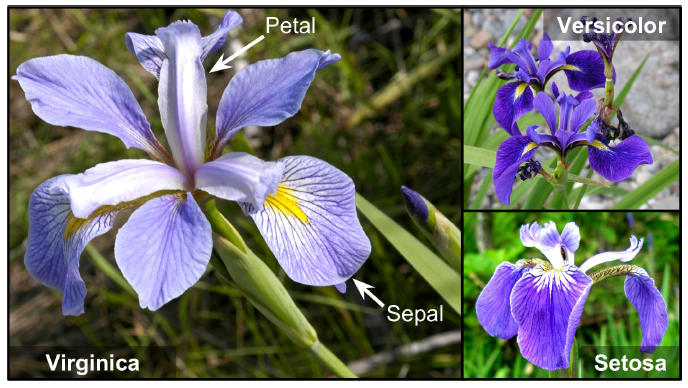

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR) #Información del dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:]  # ancho del pétalo
y = (iris["target"] == 2).astype(int)  #  1 si es Iris-virginica, 0 en caso contrario

Ahora entrenemos un modelo de regresión logística:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y) #Ajuste el modelo de acuerdo con los datos de entrenamiento dados.

LogisticRegression(random_state=42)

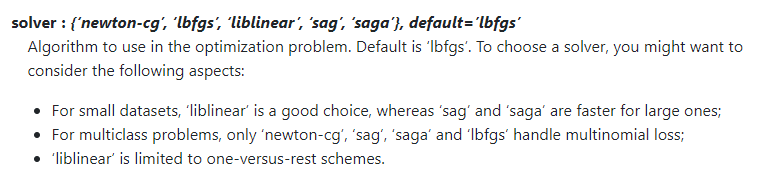

Veamos las probabilidades estimadas del modelo para flores con anchos de pétalos que varían de 0 a 3 cm.

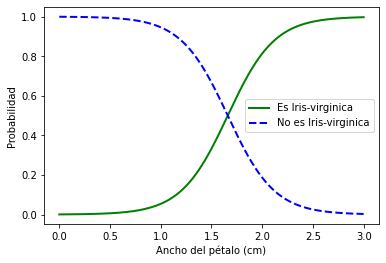

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2)
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2)
plt.legend(["Es Iris-virginica" , "No es Iris-virginica"], loc= 'best')
plt.xlabel("Ancho del pétalo (cm)")
plt.ylabel("Probabilidad")
plt.show()

El ancho de los pétalos de las flores de Iris-Virginica varía de 1.4 cm a 2.5 cm, mientras que las otras flores de IRIS generalmente tienen un ancho de pétalo más pequeño, que varía de 0.1 cm a 1.8 cm. Hay un poco de superposición. 

Por encima de unos 2 cm, el clasificador tiene mucha confianza en que la flor es una Iris-Virginica (produce una alta probabilidad para esa clase), mientras que por debajo de 1 cm tiene mucha confianza en que no es una Iris-Virginica. 

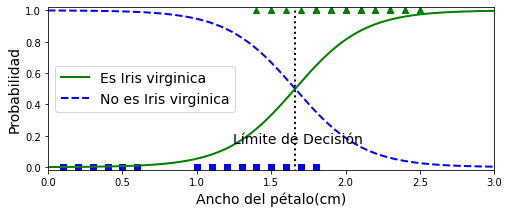

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Es Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="No es Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Límite de Decisión", fontsize=14, color="k", ha="center")

plt.xlabel("Ancho del pétalo(cm)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

Si le pide que prediga la clase (utilizando el método `predict()` en lugar del método `predict_proba()`), devolverá la clase que sea más probable. Por lo tanto, hay un límite de decisión alrededor de 1.6 cm donde ambas probabilidades son iguales al 50%: si el ancho del pétalo es mayor a 1.6 cm, el clasificador predecirá que la flor es una Iris-Virginica, o de lo contrario predecirá que no lo es (aunque no sea muy seguro):


In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]]) #1 si es Iris-virginica, 0 en caso contrario

array([1, 0])

Podemos mostrar el mismo conjunto de datos, pero esta vez analizando dos características: **ancho** y **largo del pétalo**. Una vez entrenado, el clasificador de regresión logística puede estimar la probabilidad de que una nueva flor sea una Iris-Virginica en función de estas dos características.

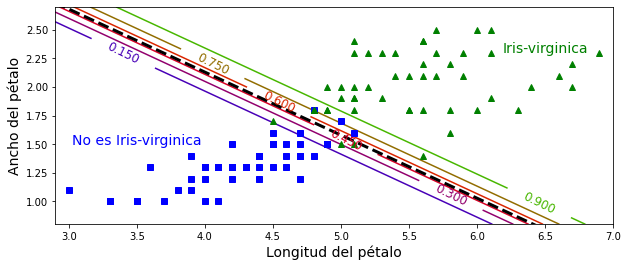

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # longitud del pétalo, ancho del pétalo
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "No es Iris-virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Longitud del pétalo", fontsize=14)
plt.ylabel("Ancho del pétalo", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

La línea discontinua representa los puntos donde el modelo estima una probabilidad del 50%: este es el límite de decisión del modelo. Tenga en cuenta que es un límite lineal. Cada línea paralela representa los puntos en los que el modelo genera una probabilidad específica, desde el 15 % (abajo a la izquierda) hasta el 90 % (arriba a la derecha). Todas las flores más allá de la línea superior derecha tienen más del 90 % de posibilidades de ser Iris-Virginica según el modelo.

#**2. Regresión multinomial o Softmax**

El modelo de regresión logística se puede generalizar para múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios, como lo acabamos de hacer. Esto se llama regresión Softmax o regresión logística multinomial.

La idea es bastante simple: cuando se le da una instancia $\mathbf{x}$, el modelo de regresión multinimial primero calcula un score $s_k(\mathbf{x})$ para cada clase $k$, luego estima la probabilidad de cada clase aplicando la función softmax (también llamada exponencial normalizada) a los scores. La ecuación para calcular $s_k(\mathbf{x})$ es:

$$s_k(\mathbf{x}) = \mathbf{x}^T\mathbf{\theta}^{(k)}$$

Tenga en cuenta que cada clase tiene su propio vector de parámetros $\mathbf{θ}^{(k)}$. Todos estos vectores normalmente se almacenan como filas en una matriz de parámetros $\Theta$. 

Una vez que haya calculado el score de cada clase para la instancia $\mathbf{x}$, puede estimar la probabilidad $\hat{p}_k$ de que la instancia pertenezca a la clase $k$ ejecutando los scores a través de la función softmax. La función calcula el exponencial de cada score, luego los normaliza (dividiendo por la suma de todos los exponenciales). Los scores generalmente se denominan logits o log-odds (aunque en realidad son logodds no normalizados).

$$\hat{p}_k = \sigma(\mathbf{s(x)})_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K \exp(s_j(\mathbf{x}))}$$

• K es el número de clases.
• s(x) es un vector que contiene las puntuaciones de cada clase para la instancia x.
• σ(s(x))k es la probabilidad estimada de que la instancia x pertenezca a la clase k dados los scores de cada clase para esa instancia.



Usemos una regresión Softmax para clasificar las flores de iris en las tres clases. `LogisticRegression` de Scikit-Learn usa uno contra todos de manera predeterminada cuando lo entrena en más de dos clases, pero puede establecer el hiperparámetro `multi_class` en "multinomial" para cambiarlo a Softmax Regression en su lugar. También debe especificar un solucionador que admita Softmax Regression, como el solucionador "lbfgs".

In [ ]:
X = iris["data"][:, (2, 3)]  # longitud del pétalo, ancho del pétalo
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

La próxima vez que encuentre un iris con pétalos de 5 cm de largo y 2 cm de ancho, puede pedirle a su modelo que le diga qué tipo de iris es, y le responderá Iris-Virginica (clase 2) con 94.2% de probabilidad (o Iris-Versicolor con 5,8% de probabilidad):

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Podemos graficar los límites de decisión resultantes (representándolos con colores de fondo) para tener una mejor visualizción del modelo.

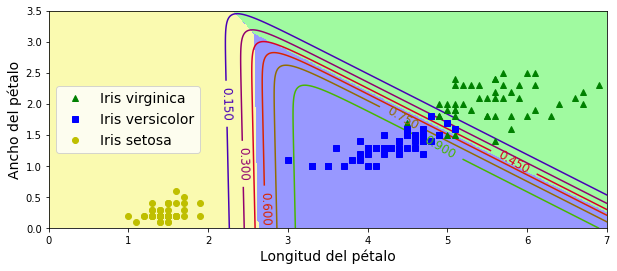

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Longitud del pétalo", fontsize=14)
plt.ylabel("Ancho del pétalo", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Observe que los límites de decisión entre dos clases cualesquiera son lineales. La figura también muestra las probabilidades para la clase Iris-Versicolor, representada por las líneas curvas (p. ej., la línea etiquetada con 0,450 representa el límite de probabilidad del 45 %).
Observe que el modelo puede predecir una clase que tiene una probabilidad estimada por debajo del 50 %. Por ejemplo, en el punto donde se encuentran todos los límites de decisión, todas las clases tienen una probabilidad estimada igual del 33 %.

[1] Aurélien Géron (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media, Inc.
